<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Bagging_Boosting_Admissions_ensembling_DecTree%2BRandomFor%2BLOGREg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UCI Machine learning

[link text](https://archive.ics.uci.edu/ml/index.php)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
import pylab as pl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Read file as panda dataframe
df = pd.read_csv("binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


**Exploratory Data Analysis**

In [ ]:
df.shape

(400, 4)

<AxesSubplot: xlabel='admit', ylabel='count'>

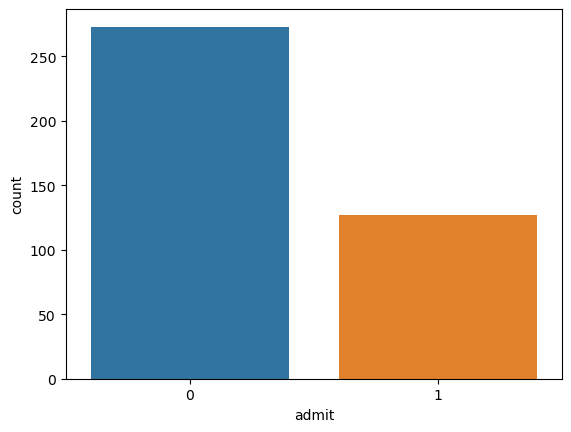

In [ ]:
sns.countplot(x ='admit', data = df)

In [ ]:
#Split data into Training and Test Set

X = df.drop('admit', axis=1)
y = df['admit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
#Normalise
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#X_train = scaler.fit_transform(X_train)

#X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

## Fit the model

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
#Confusion Matrix

results = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix of test data:")
print(results)

Confusion Matrix of test data:
[[36 18]
 [14 12]]


In [ ]:
#Another method to calculate accuracy
print('Accuracy of Decision tree on train set',(dt.score(X_train, y_train)))
print('Accuracy of Decision tree on test set',(dt.score(X_test, y_test)))

Accuracy of Decision tree on train set 0.996875
Accuracy of Decision tree on test set 0.6


# Bagging


* **base_estimator** - This represents the algorithm used as the base/weak learners. We will use the DecisionTreeClassifier algorithm as our weak/base learners.

* **n_estimators** - This represents the number of weak learners used. We will use n decision trees to build the bagging model.

* **max_samples** - The maximum number of data that is sampled from the training set. We use 80% of the training dataset for resampling.

* **bootstrap** - Allows for resampling of the training dataset without replacement.

* **oob_score** - Used to compute the model’s accuracy score after training.

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, n_estimators = 20)

In [ ]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [ ]:
print('Test score',bg.score(X_test,y_test))

Test score 0.6375


In [ ]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

In [ ]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=200, oob_score=True, random_state=0)

In [ ]:
print('Train score', bag_model.score(X_train, y_train))
print('Test score', bag_model.score(X_test, y_test))

Train score 0.996875
Test score 0.65


In [ ]:
print('Out of bag score',bag_model.oob_score_)

Out of bag score 0.721875


# Boosting

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 10, learning_rate = 1)

In [ ]:
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=10)

In [ ]:
print('Boosting score on test',adb.score(X_test,y_test))

Boosting score on test 0.5875


# Voting Classifier - Multiple Model Ensemble

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('rf',rf)], voting = 'hard')

In [ ]:
evc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [ ]:
evc.score(X_test, y_test)

0.6875